# 패션 아이템 분류 Deep NeuralNet
### 완전 연결 신명망

70,000개의 이미지 중에서 60,000개는 신경망을 훈련하고 나머지 10,000는 신경망 성능을 테스트하고 평가하는데 사용

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


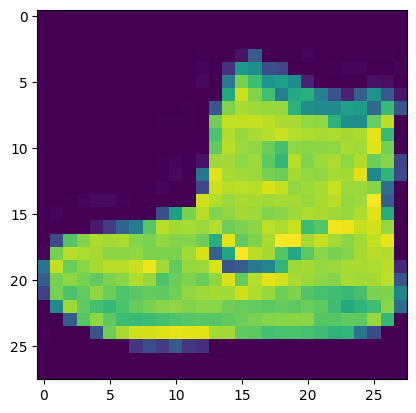

In [3]:
plt.imshow(train_images[0])

#### 이미지 픽셀값은 0에서 255 사이의 정수여서 이 상태로 직접 투입하면 안되고 반드시 0.0과 1.0 사이의 실수로 만들어서 정규화한다.

In [4]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [6]:
# CNN 입력 형식 (batch, 28, 28, 1)
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

In [7]:
# CNN 모델 구성
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### 손실값을 최소화하기 위해서 옵티마이저(최적화 모듈)를 사용하고, 적응적 학습을 수행하는 Adam 알고리즘을 사용한다.

In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
# 성능 향상 관찰을 위해 검증 데이터 떼어놓음
model.fit(train_images, train_labels, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 50s 33ms/step - accuracy: 0.8877 - loss: 0.3061 - val_accuracy: 0.8967 - val_loss: 0.2814
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 78s 30ms/step - accuracy: 0.9030 - loss: 0.2628 - val_accuracy: 0.8981 - val_loss: 0.2743
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 47s 31ms/step - accuracy: 0.9159 - loss: 0.2333 - val_accuracy: 0.9078 - val_loss: 0.2569
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 47s 31ms/step - accuracy: 0.9223 - loss: 0.2067 - val_accuracy: 0.9053 - val_loss: 0.2558
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 83s 32ms/step - accuracy: 0.9297 - loss: 0.1881 - val_accuracy: 0.9098 - val_loss: 0.2492


In [13]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('정확도:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8981 - loss: 0.2804
정확도: 0.8996999859809875


## 위의 MLP 신경망을 바꾸어 CNN 방식으로 분류. 10개의 범주의 약 70,000개의 팬션 관련 이미지 해상도 28X28 인 경우에 CNN으로 구성해서 성능이 얼마나 향상하는지 확인.

기존의 MLP 모델은 테스트 데이터 기준으로 약 **84.97%**의 정확도를 보였다.  
반면 CNN 모델을 구성하여 동일한 데이터셋에 대해 학습한 결과, 테스트 정확도가 약 **89.97% 수준으로 향상**되었다.

이는 CNN이 이미지의 **공간적 구조(패턴, 경계 등)**를 잘 인식할 수 있기 때문이며,  
단순히 픽셀을 펼쳐서 처리하는 MLP에 비해 **더 정교한 특성 추출이 가능하다는 장점**을 보여준다.

따라서 이미지 분류 문제에서는 MLP보다 CNN이 확연히 더 우수한 성능을 발휘함을 확인할 수 있었다.
